<a href="https://colab.research.google.com/github/janjibDEV/QuantFinanceNotebook/blob/main/QuantFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rujhan's Quant Finance Notebook

Content:
- Find beta

## Find Beta

### Definition
- Beta is a measure of volatility relative to a benchmark, such as the S&P 500.
- measures the systematic risk of a security or a portfolio compared to an index like the S&P 500

### Task
- Find beta
- Prove that growth stocks would have a beta over 1, probably much higher.

### References
- https://www.investopedia.com/articles/investing/092115/alpha-and-beta-beginners.asp
- https://pyquantnews.com/seeking-alpha-hedge-your-beta-with-python/

In [ ]:
# Import libraries

import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [ ]:
# Load data. We will use NVIDIA (NVDA).
# SP500 (SPY) is the benchmark (representing the market)
tickers = ["NVDA","SPY"]

# Duration: 10 years
end = dt.datetime.now()
start = end - dt.timedelta(days=365*5)

# Load data
data = yf.download(tickers, start, end)
data

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  NVDA         SPY        NVDA         SPY        NVDA   
Date                                                                     
2019-01-16   36.920975  240.510437   37.209999  260.980011   38.075001   
2019-01-17   37.635376  242.335083   37.930000  262.959991   38.332500   
2019-01-18   38.927753  245.560532   39.232498  266.459991   39.494999   
2019-01-22   36.903618  242.242874   37.192501  262.859985   39.044998   
2019-01-23   37.032600  242.749786   37.322498  263.410004   38.645000   
...                ...         ...         ...         ...         ...   
2024-01-08  522.530029  474.600006  522.530029  474.600006  522.750000   
2024-01-09  531.400024  473.880005  531.400024  473.880005  543.250000   
2024-01-10  543.500000  476.559998  543.500000  476.559998  546.000000   
2024-01-11  548.219971  476.350006  548.219971  476.350006  553.460022   
2024-01-12  547.099976  476.679993  547.099976  476.679993  549.700012   

                               Low                    Open              \
                   SPY        NVDA         SPY        NVDA         SPY   
Date                                                                     
2019-01-16  261.970001   37.154999  260.600006   37.742500  260.829987   
2019-01-17  263.920013   36.602501  259.959991   36.877499  260.010010   
2019-01-18  266.980011   37.912498  263.000000   38.432499  264.980011   
2019-01-22  265.059998   36.887501  261.059998   38.927502  264.820007   
2019-01-23  264.790009   37.007500  260.660004   37.750000  264.010010   
...                ...         ...         ...         ...         ...   
2024-01-08  474.750000  494.790009  468.299988  495.119995  468.429993   
2024-01-09  474.929993  516.900024  471.350006  524.010010  471.869995   
2024-01-10  477.450012  534.890015  473.869995  536.159973  474.160004   
2024-01-11  478.119995  535.599976  472.260010  549.989990  477.589996   
2024-01-12  478.600006  543.299988  475.230011  546.200012  477.839996   

              Volume             
                NVDA        SPY  
Date                             
2019-01-16  47010400   77636700  
2019-01-17  49343600   96118400  
2019-01-18  65133600  127900300  
2019-01-22  66155200  115531200  
2019-01-23  59102000   86030300  
...              ...        ...  
2024-01-08  64251000   74879100  
2024-01-09  77310000   65931400  
2024-01-10  53379600   67310600  
2024-01-11  59675900   77940700  
2024-01-12  35247900   57944000  

[1257 rows x 12 columns]

In [ ]:
# We only need the adj close price

asset = data["Adj Close"].NVDA
benchmark = data["Adj Close"].SPY


In [ ]:
# Get the returns of asset and benchmark by calculating the percent change
asset_return = asset.pct_change().dropna()
benchmark_return = benchmark.pct_change().dropna()

benchmark_return

Date
2019-01-17    0.007587
2019-01-18    0.013310
2019-01-22   -0.013511
2019-01-23    0.002093
2019-01-24    0.000532
                ...   
2024-01-08    0.014276
2024-01-09   -0.001517
2024-01-10    0.005655
2024-01-11   -0.000441
2024-01-12    0.000693
Name: SPY, Length: 1256, dtype: float64

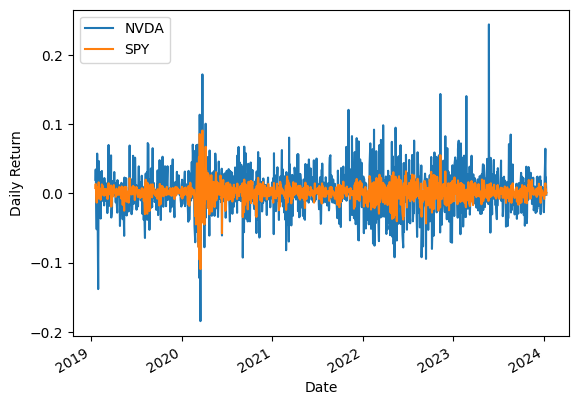

In [ ]:
# Plot graph
asset_return.plot()
benchmark_return.plot()
plt.ylabel("Daily Return")
plt.legend()
plt.show()

### The Equation

```math
y = a + bx + u
```
- y: performance of the stock or fund.
- a: excess return of the stock or fund.
- b: volatility relative to benchmark
- x : performance of benchmark
- u: residual, the unexplained random portion of performance in a given year.

**Alpha is the intercept and beta is the gradient**

In [ ]:
# Plot a linear regression graph
X = benchmark_return.values
Y = asset_return.values

def linreg(x,y):
  # Add a column of 1s to fit alpha
  x = sm.add_constant(x)
  model = regression.linear_model.OLS(y, x).fit()
  # Remove the constant now that we're done
  x = x[:, 1]
  # params[0] returns constant (alpha), params[1] return coefficient (beta)
  return model.params[0], model.params[1]

# get alpha and beta
alpha, beta = linreg(X,Y)
print(f"Alpha: {alpha}, Beta: {beta}")

Alpha: 0.0015626398556015456, Beta: 1.7588687271173495


- Alpha is 0 means that owning NVDA alone is not enough to beat the market.
- Beta 1.68 means that for every 1% benchmark moves, 1.68% asset will move.

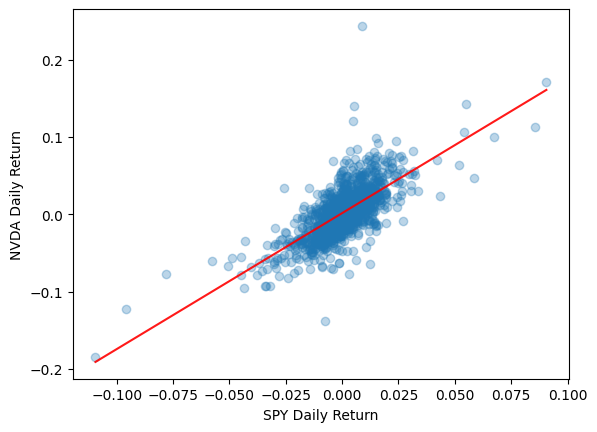

In [ ]:
# Plot returns and regression line

X2 = np.linspace(X.min(),X.max(), 100)
Y_hat = alpha + (beta * X2)

# Plot raw data
plt.scatter(X, Y, alpha = 0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("NVDA Daily Return")

# Draw regression line
plt.plot(X2, Y_hat, "r", alpha = 0.9)

### Hedge Beta

We are going to hedge beta to see how our asset performs when beta is againt the market = -1.

In [ ]:
portfolio = -1 * beta * benchmark_return + asset_return
portfolio.name = "TSLA + Hedge"
portfolio

Date
2019-01-17    0.006006
2019-01-18    0.010929
2019-01-22   -0.028234
2019-01-23   -0.000185
2019-01-24    0.056336
                ...   
2024-01-08    0.039171
2024-01-09    0.019643
2024-01-10    0.012823
2024-01-11    0.009459
2024-01-12   -0.003261
Name: TSLA + Hedge, Length: 1256, dtype: float64

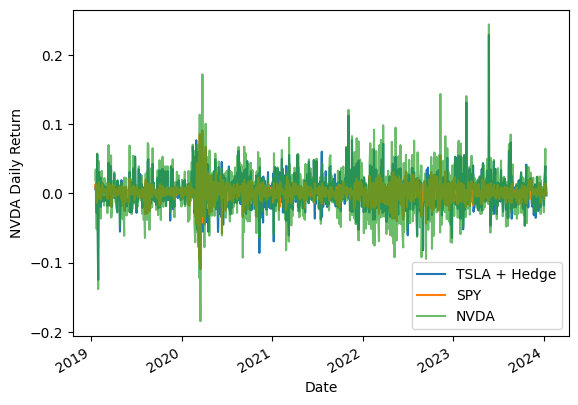

In [ ]:
portfolio.plot(alpha=1)
benchmark_return.plot(alpha=1)
asset_return.plot(alpha=0.7)
plt.ylabel("NVDA Daily Return")
plt.legend()

In [ ]:
P = portfolio.values
alpha, beta = linreg(X, P)
print(f"Alpha: {alpha}, Beta: {beta}")

Alpha: 0.001562639855601546, Beta: 8.257283745649602e-16
